In [19]:
import cv2
import numpy as np
import os
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



In [20]:
def preprocess_image(image):
    
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Apply CLAHE on the V channel to improve contrast
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    v_channel = hsv[:, :, 2]
    v_channel_clahe = clahe.apply(v_channel)
    hsv[:, :, 2] = v_channel_clahe

    # Define the range of skin color in HSV
    lower_skin = np.array([0, 20, 70], dtype=np.uint8)
    upper_skin = np.array([20, 255, 255], dtype=np.uint8)

    # Create a mask to segment the skin color
    skin_mask = cv2.inRange(hsv, lower_skin, upper_skin)

    # Apply a series of erosions and dilations to remove noise and small objects
    kernel = np.ones((5, 5), np.uint8)
    skin_mask = cv2.erode(skin_mask, kernel, iterations=2)
    skin_mask = cv2.dilate(skin_mask, kernel, iterations=2)

    # Blur the mask to help remove shadows
    skin_mask = cv2.GaussianBlur(skin_mask, (5, 5), 0)

    # Find the largest contour (assumed to be the hand) and draw it on a blank mask
    contours, _ = cv2.findContours(skin_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    max_contour = max(contours, key=cv2.contourArea)
    hand_mask = np.zeros_like(skin_mask)
    cv2.drawContours(hand_mask, [max_contour], -1, 255, thickness=cv2.FILLED)

    # Apply a closing morphological operation to reduce noise around the hand's edges
    kernel = np.ones((7, 7), np.uint8)
    hand_mask = cv2.morphologyEx(hand_mask, cv2.MORPH_CLOSE, kernel)

    return hand_mask

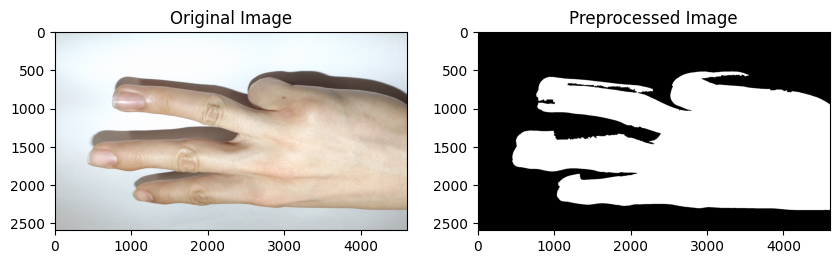

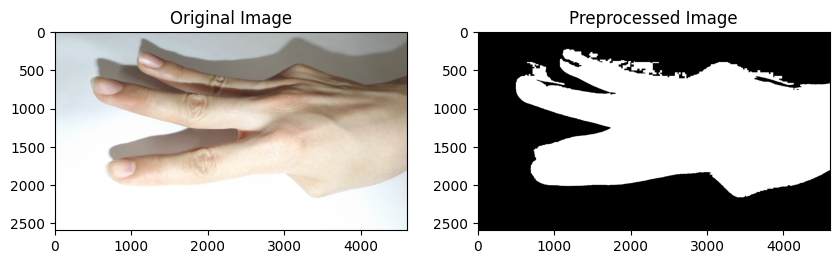

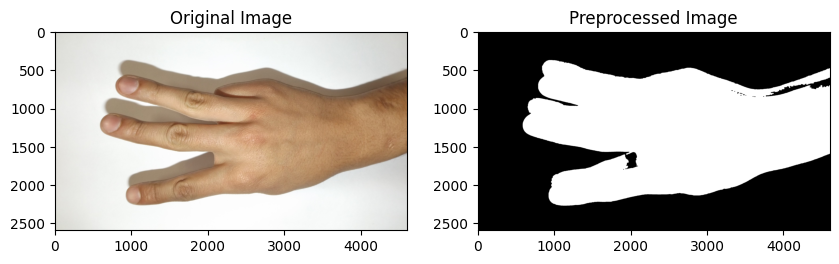

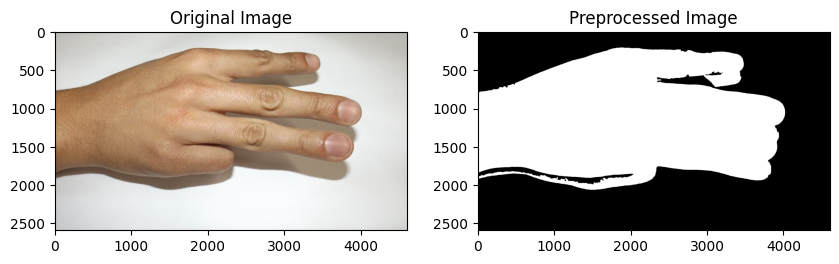

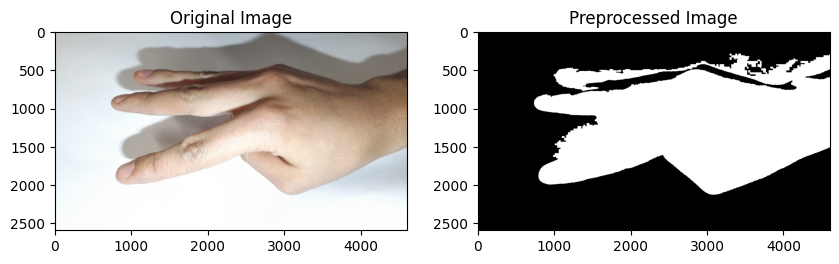

In [21]:
def test_stages(channel, index):
    # Load a sample images from the dataset

    sample_image_path = 'dataset/men/' + channel + '/' + channel + '_men (' + str(index) + ').JPG'
    img = cv2.imread(sample_image_path)

    # Preprocess the image
    preprocessed_image = preprocess_image(img)


    # Display the original, preprocessed images and features
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[0].set_title("Original Image")
    axes[1].imshow(preprocessed_image, cmap='gray')
    axes[1].set_title("Preprocessed Image")
    plt.show()

# Test the stages of the preprocessing pipeline by atterating over the channel with 5 indexes
for index in range(1, 6):
    test_stages(str(3), str(index))